In [37]:
import os
import numpy as np
from skimage import io
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [38]:
def img_preproc(img_list, IMG_PATH):
    train_ims = np.zeros((len(img_list), 900))
    for i, img_name in enumerate(img_list):
        if not img_name[-1] == 't':
            image = io.imread(os.path.join(IMG_PATH, img_name), as_gray=True)
            image.resize((30,30))
            im = image.flatten()
            train_ims[i,:] = im
            if i % 1000 == 0:
                print(i)
    return train_ims

In [31]:
########################10K Images#############################
list_10k_imgs = os.listdir('/dataset/google-cc/10k/images')
imgs_10 = img_preproc(list_100k_imgs, '/dataset/google-cc/10k/images')

In [33]:
pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(imgs_10)

In [46]:
km = KMeans(
    n_clusters=20, init='k-means++',
    n_init=30, max_iter=50, 
    tol=1e-04, random_state=0
)
y_pred = km.fit_predict(train_images_pca)

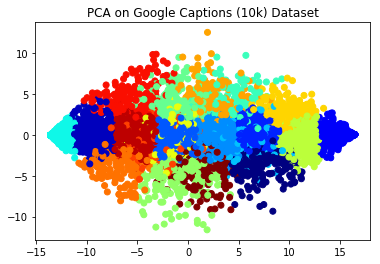

In [47]:
pca = PCA(n_components=2)
train_images_pca_2 = pca.fit_transform(imgs_10)  
x = train_images_pca_2[:,0]
y = train_images_pca_2[:,1]
plt.scatter(x,y, c=y_pred, cmap=plt.cm.get_cmap("jet", 20))
plt.title("PCA on Google Captions (10k) Dataset")
plt.show()

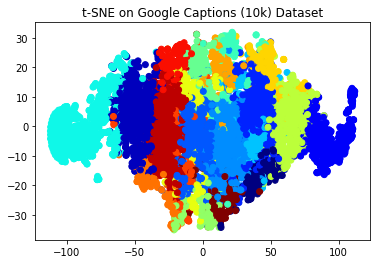

In [48]:
train_images_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca').fit_transform(train_images_pca)
x = train_images_tsne[:,0]
y = train_images_tsne[:,1]
plt.scatter(x,y, c=y_pred, cmap=plt.cm.get_cmap("jet", 20))
plt.title("t-SNE on Google Captions (10k) Dataset")
plt.show()
###############################################################

In [ ]:
########################100K Images############################
list_100k_imgs = os.listdir('/dataset/google-cc/100k/images')
imgs_100 = img_preproc(list_100k_imgs, '/dataset/google-cc/100k/images')

In [52]:
pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(imgs_100)

In [54]:
km = KMeans(
    n_clusters=20, init='k-means++',
    n_init=30, max_iter=50, 
    tol=1e-04, random_state=0
)
y_pred = km.fit_predict(train_images_pca)

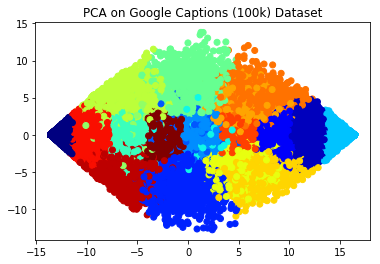

In [55]:
pca = PCA(n_components=2)
train_images_pca_2 = pca.fit_transform(imgs_100)  
x = train_images_pca_2[:,0]
y = train_images_pca_2[:,1]
plt.scatter(x,y, c=y_pred, cmap=plt.cm.get_cmap("jet", 20))
plt.title("PCA on Google Captions (100k) Dataset")
plt.show()

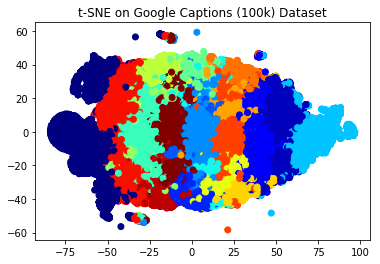

In [56]:
train_images_tsne = TSNE(n_components=2, perplexity=40, learning_rate=600, init='pca').fit_transform(train_images_pca)
x = train_images_tsne[:,0]
y = train_images_tsne[:,1]
plt.scatter(x,y, c=y_pred, cmap=plt.cm.get_cmap("jet", 20))
plt.title("t-SNE on Google Captions (100k) Dataset")
plt.show()
###############################################################